In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
# import the necessary packages
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [2]:
#NOTE - I am working in an nvidia-docker image with official tensorflow docker.
# I had to add this line AND 'trust' the notebook on top-right. Otherwise an ugly
# cudNN error is present.

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
from tensorflow.keras.models import load_model
my_model = load_model('/tf/beetleData/fam_10_58x58.h5')


In [5]:
image_size = (58,58)
orig = cv2.imread('/tf/beetleData/images/rbi_1013.jpg')
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
image = cv2.resize(orig, image_size)

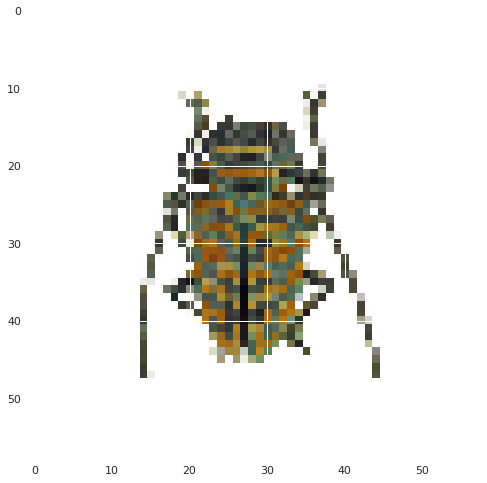

In [6]:
plt.imshow(image)

In [16]:
model = my_model
image.shape = (1,) + image.shape
preds = model.predict(image)
i = np.argmax(preds[0])

In [17]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 58, 58, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 29, 29, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 29, 29, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 29, 29, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
layer_name = 'batch_normalization_10'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(image)

In [ ]:
plt.hist(intermediate_output.flatten())

In [4]:
import numpy as np
import os
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

image_dir = '/tf/beetleData/images/'
orig = cv2.imread('/tf/beetleData/images/rbi_1013.jpg')
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
image = cv2.resize(orig, image_size)

In [7]:
import pandas as pd
labels = pd.read_csv('/tf/beetleData/labels/master_rbi.csv')

In [8]:
labels

Family: Subfamily:           Country:  \
0         Anthribidae          /  Equatorial Guinea   
1         Anthribidae          /  Equatorial Guinea   
2         Anthribidae          /         Madagascar   
3           Brentidae          /          Indonesia   
4           Brentidae          /          Indonesia   
...               ...        ...                ...   
4069        Silphidae          /          Australia   
4070  Trictenotomidae          /           Malaysia   
4071  Trictenotomidae          /           Malaysia   
4072  Trictenotomidae          /           Malaysia   
4073       Zopheridae          /          Australia   

                      Province:       Genus:   Species:         View:  \
0                             /  Phaeotragus      gigas        Dorsal   
1                             /  Phaeotragus      gigas       Lateral   
2                             /  Tophroderes  phrenatus        Dorsal   
3                       Sumatra  Eutrachelus  temmincki        Dorsal   
4                       Sumatra  Eutrachelus  temmincki        Dorsal   
...                         ...          ...        ...           ...   
4069                   Victoria       Silpha    perlata        Dorsal   
4070  Pahang, Cameron Highlands   Autocrates   vitalisi        Dorsal   
4071  Pahang, Cameron Highlands   Autocrates   vitalisi       Lateral   
4072  Pahang, Cameron Highlands   Autocrates   vitalisi  Lateral Head   
4073                 Queensland   Zopherosis    georgii        Dorsal   

         Filename:  
0        rbi_1.jpg  
1        rbi_2.jpg  
2        rbi_3.jpg  
3        rbi_4.jpg  
4        rbi_5.jpg  
...            ...  
4069  rbi_4245.jpg  
4070  rbi_4246.jpg  
4071  rbi_4247.jpg  
4072  rbi_4248.jpg  
4073  rbi_4249.jpg  

[4074 rows x 8 columns]

In [9]:
labels[labels['Filename:'] == i]

NameError: name 'i' is not defined

In [11]:
dorsal_only = labels[labels['View:'] == 'Dorsal']

In [12]:
toplost = list(dorsal_only["Family:"].value_counts()[:8].index)

In [13]:
top8only = dorsal_only[dorsal_only['Family:'].isin(toplost)]

In [23]:
top8only = top8only.sample(frac=1)

In [24]:
top8only

Family:    Subfamily:                               Country:  \
64     Buprestidae             /                               Malaysia   
3897  Scarabaeidae  Scarabaeinae                                 Mexico   
1534  Cicindelidae             /                       Papua New Guinea   
2112  Scarabaeidae    Cetoniinae                              Indonesia   
1667     Lucanidae             /                              Indonesia   
...            ...           ...                                    ...   
2352  Scarabaeidae    Cetoniinae                               Malaysia   
1101  Cerambycidae      Lamiinae                          French Guiana   
2962  Scarabaeidae    Cetoniinae                           South Africa   
3056  Scarabaeidae    Dynastinae  Congo, The Democratic Republic of the   
1883     Lucanidae             /                                      /   

                          Province:        Genus:      Species:   View:  \
64                           Pahang   Chrysochroa   ephippigera  Dorsal   
3897                              /      Phanaeus      melampus  Dorsal   
1534                         Madang   Trichondyla        aptera  Dorsal   
2112                   West Sumatra      Clintera          atra  Dorsal   
1667                        Sumatra    Cyclomatus       elaphus  Dorsal   
...                             ...           ...           ...     ...   
2352                              /      Glycosia      tricolor  Dorsal   
1101                              /     Taeniotes     farinosus  Dorsal   
2962                     North West  Trichostetha  fascicularis  Dorsal   
3056  Katanga, Upemba National Park   Cyphonistes        arrowi  Dorsal   
1883                              /   Odontolabis    wollastoni  Dorsal   

         Filename:  
64      rbi_65.jpg  
3897  rbi_4064.jpg  
1534  rbi_1555.jpg  
2112  rbi_2167.jpg  
1667  rbi_1710.jpg  
...            ...  
2352  rbi_2425.jpg  
1101  rbi_1114.jpg  
2962  rbi_3079.jpg  
3056  rbi_3177.jpg  
1883  rbi_1927.jpg  

[2955 rows x 8 columns]

In [ ]:
for i in top8only['Filename:']:
    print(i)

In [31]:
image_dir = '/tf/beetleData/images/'
layer_name = 'batch_normalization_10'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
filenames = list()
embeddings = list()
class_labels = list()

for i in top8only['Filename:']:
    try:
        #print(i)
        orig = cv2.imread(image_dir + i)
        orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
        image = cv2.resize(orig, image_size)
        image.shape = (1,) + image.shape
        intermediate_output = intermediate_layer_model.predict(image)
        filenames.append(i)
        embeddings.append(intermediate_output)
        class_labels.append(labels[labels['Filename:'] == i]['Family:'].values[0])
    except:
        print(i)
    
embed2 = [i.flatten() for i in embeddings]

In [3]:
!pip install opencv-python

len(embed2)

In [ ]:
embed2[0]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(embed2)
embed3 = pca.transform(embed2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
plt.scatter(embed3[:,0],embed3[:,1])

In [32]:

from sklearn.manifold import TSNE

X_valid_compressed = embed2
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

In [ ]:
len(class_labels)

In [ ]:
len(np.unique(np.array(class_labels)))

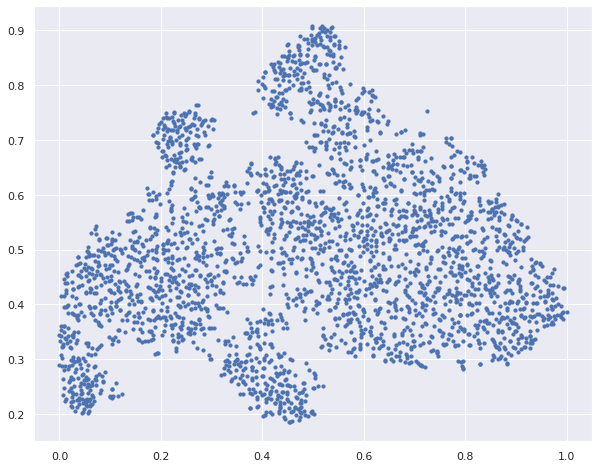

In [33]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])


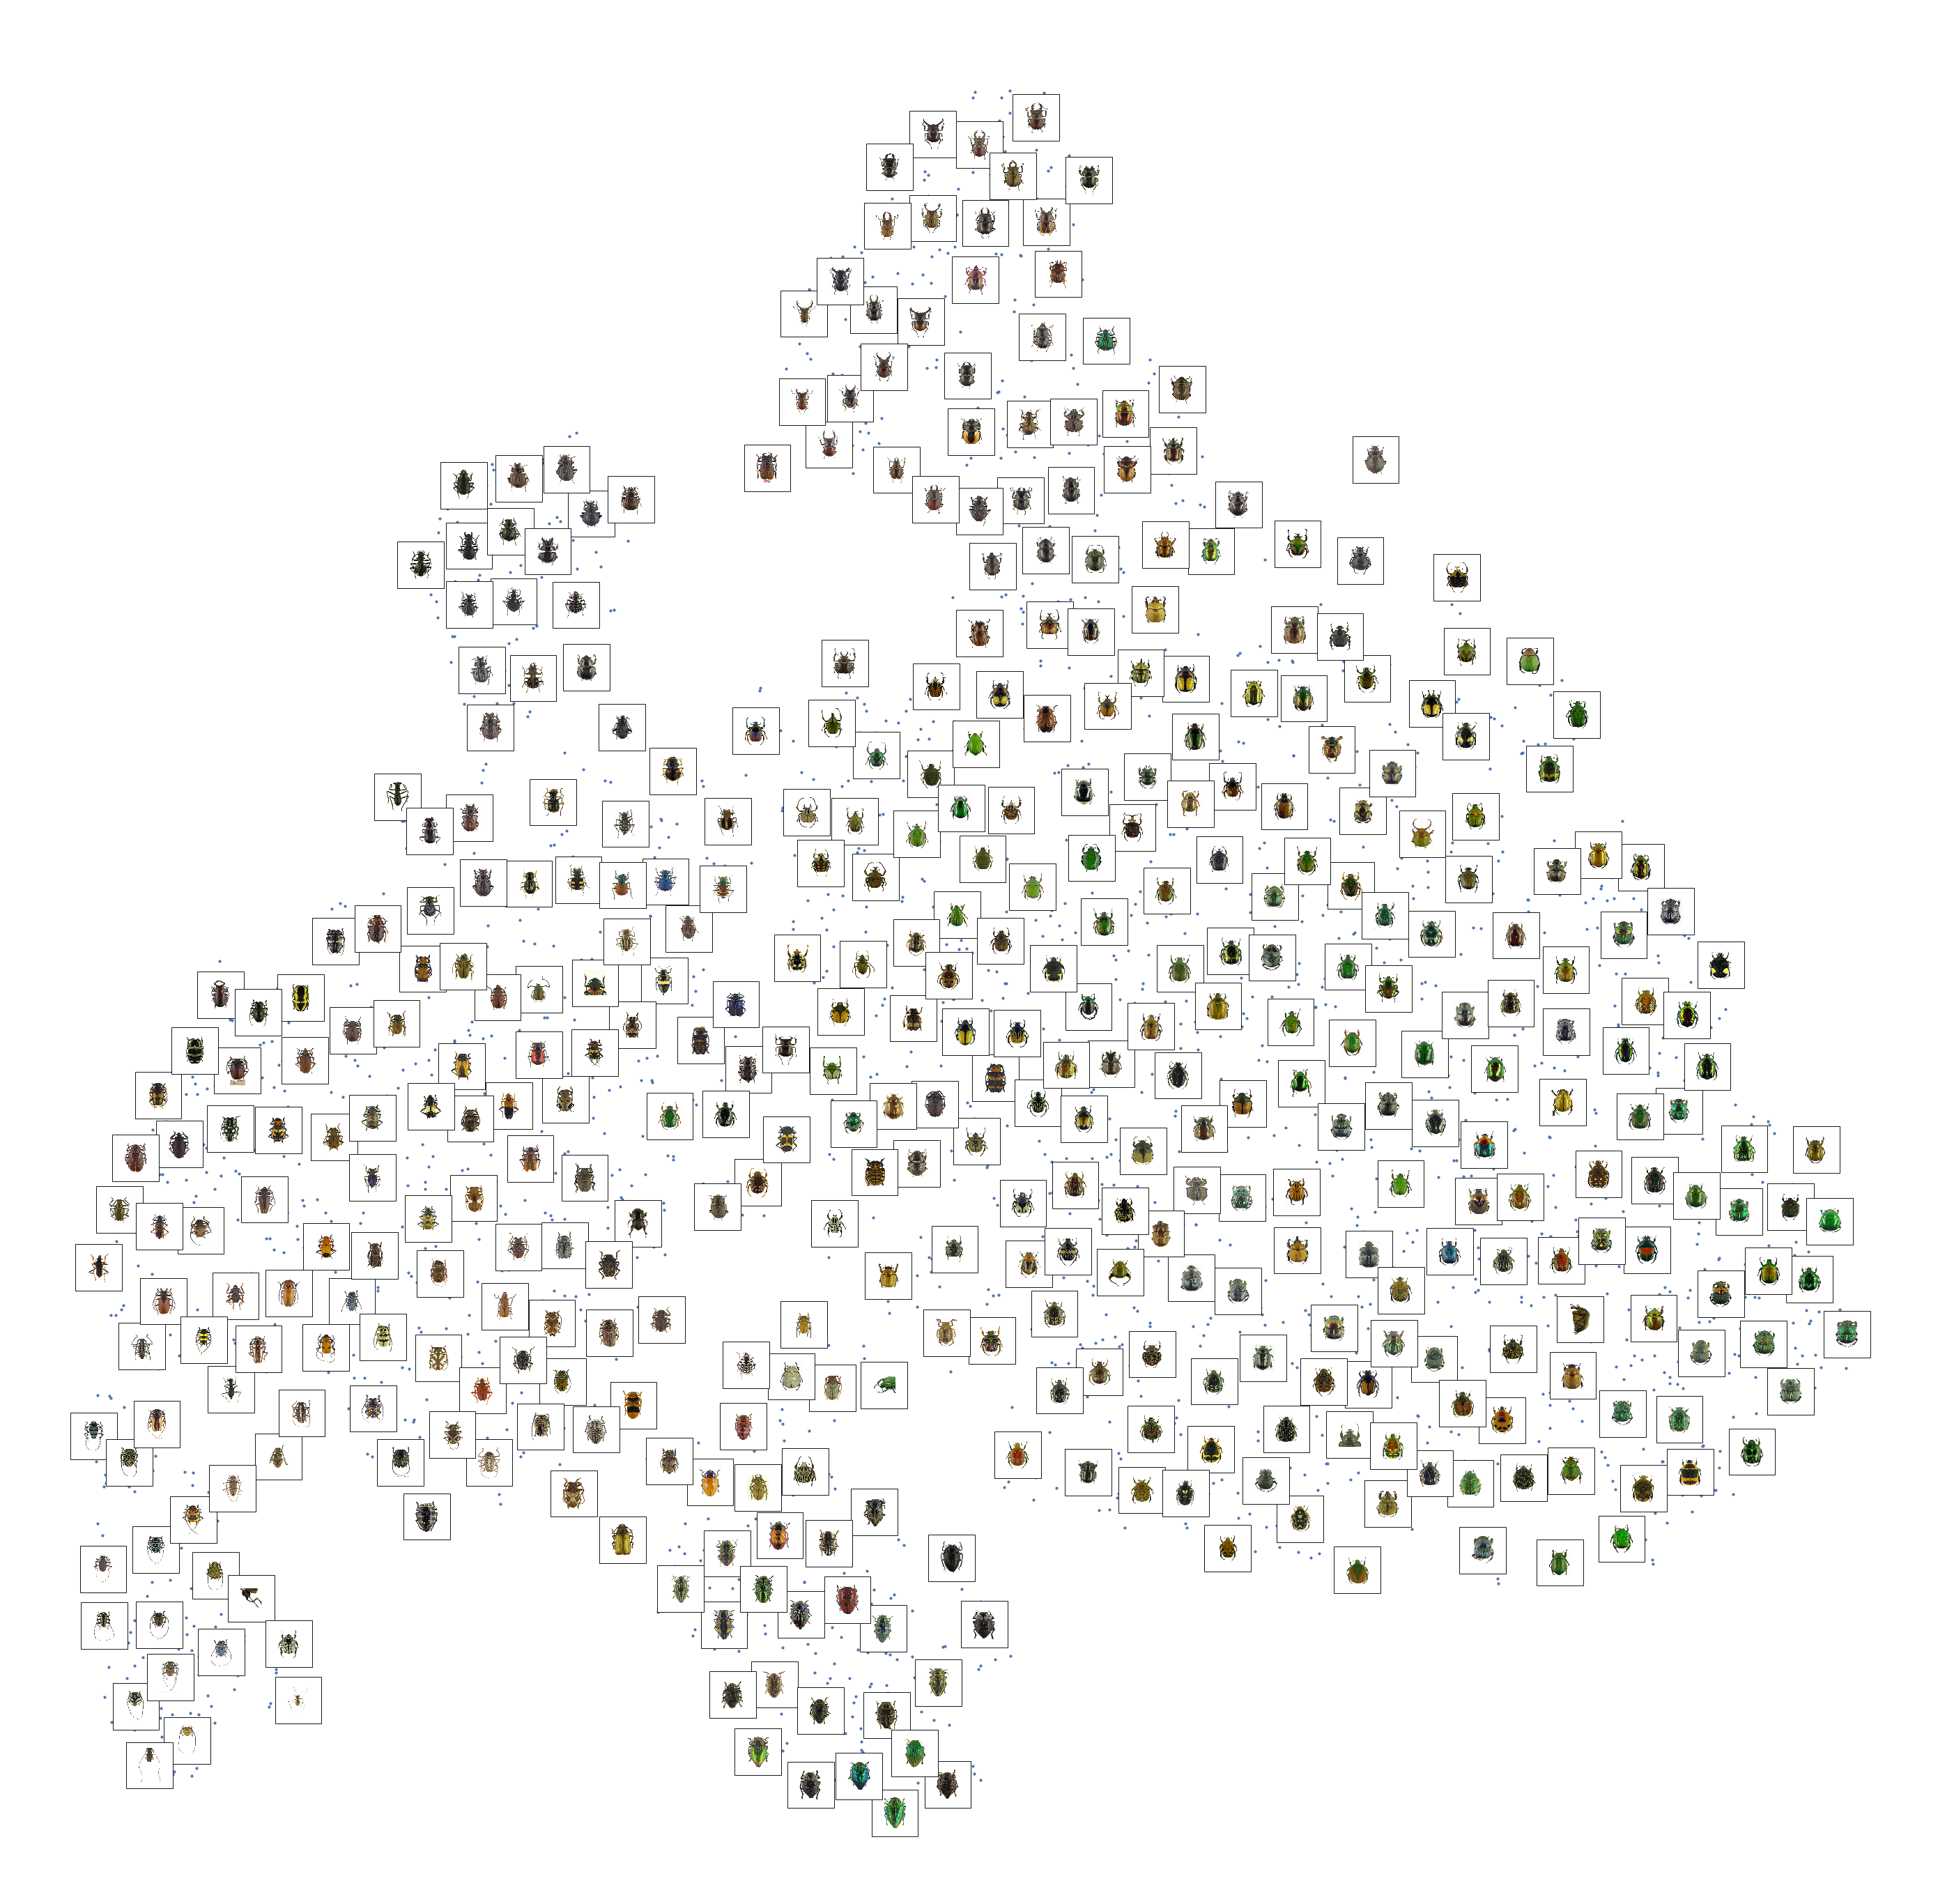

In [34]:
import matplotlib as mpl
def read_img(filename):
    fil=image_dir + filename
    img = cv2.imread(fil)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,image_size)
    return img

# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(50, 50))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1],  s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.0005: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        #print(image_positions)
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(read_img(filenames[index])),
            position)
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.savefig("/tf/beetleData/HERE.PNG")
plt.show()

In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(class_labels)
le.classes_
class_lab = le.transform(class_labels)


['Buprestidae',
 'Carabidae',
 'Cerambycidae',
 'Cicindelidae',
 'Geotrupidae',
 'Lucanidae',
 'Scarabaeidae',
 'Silphidae']

In [40]:
cmap = plt.cm.tab10

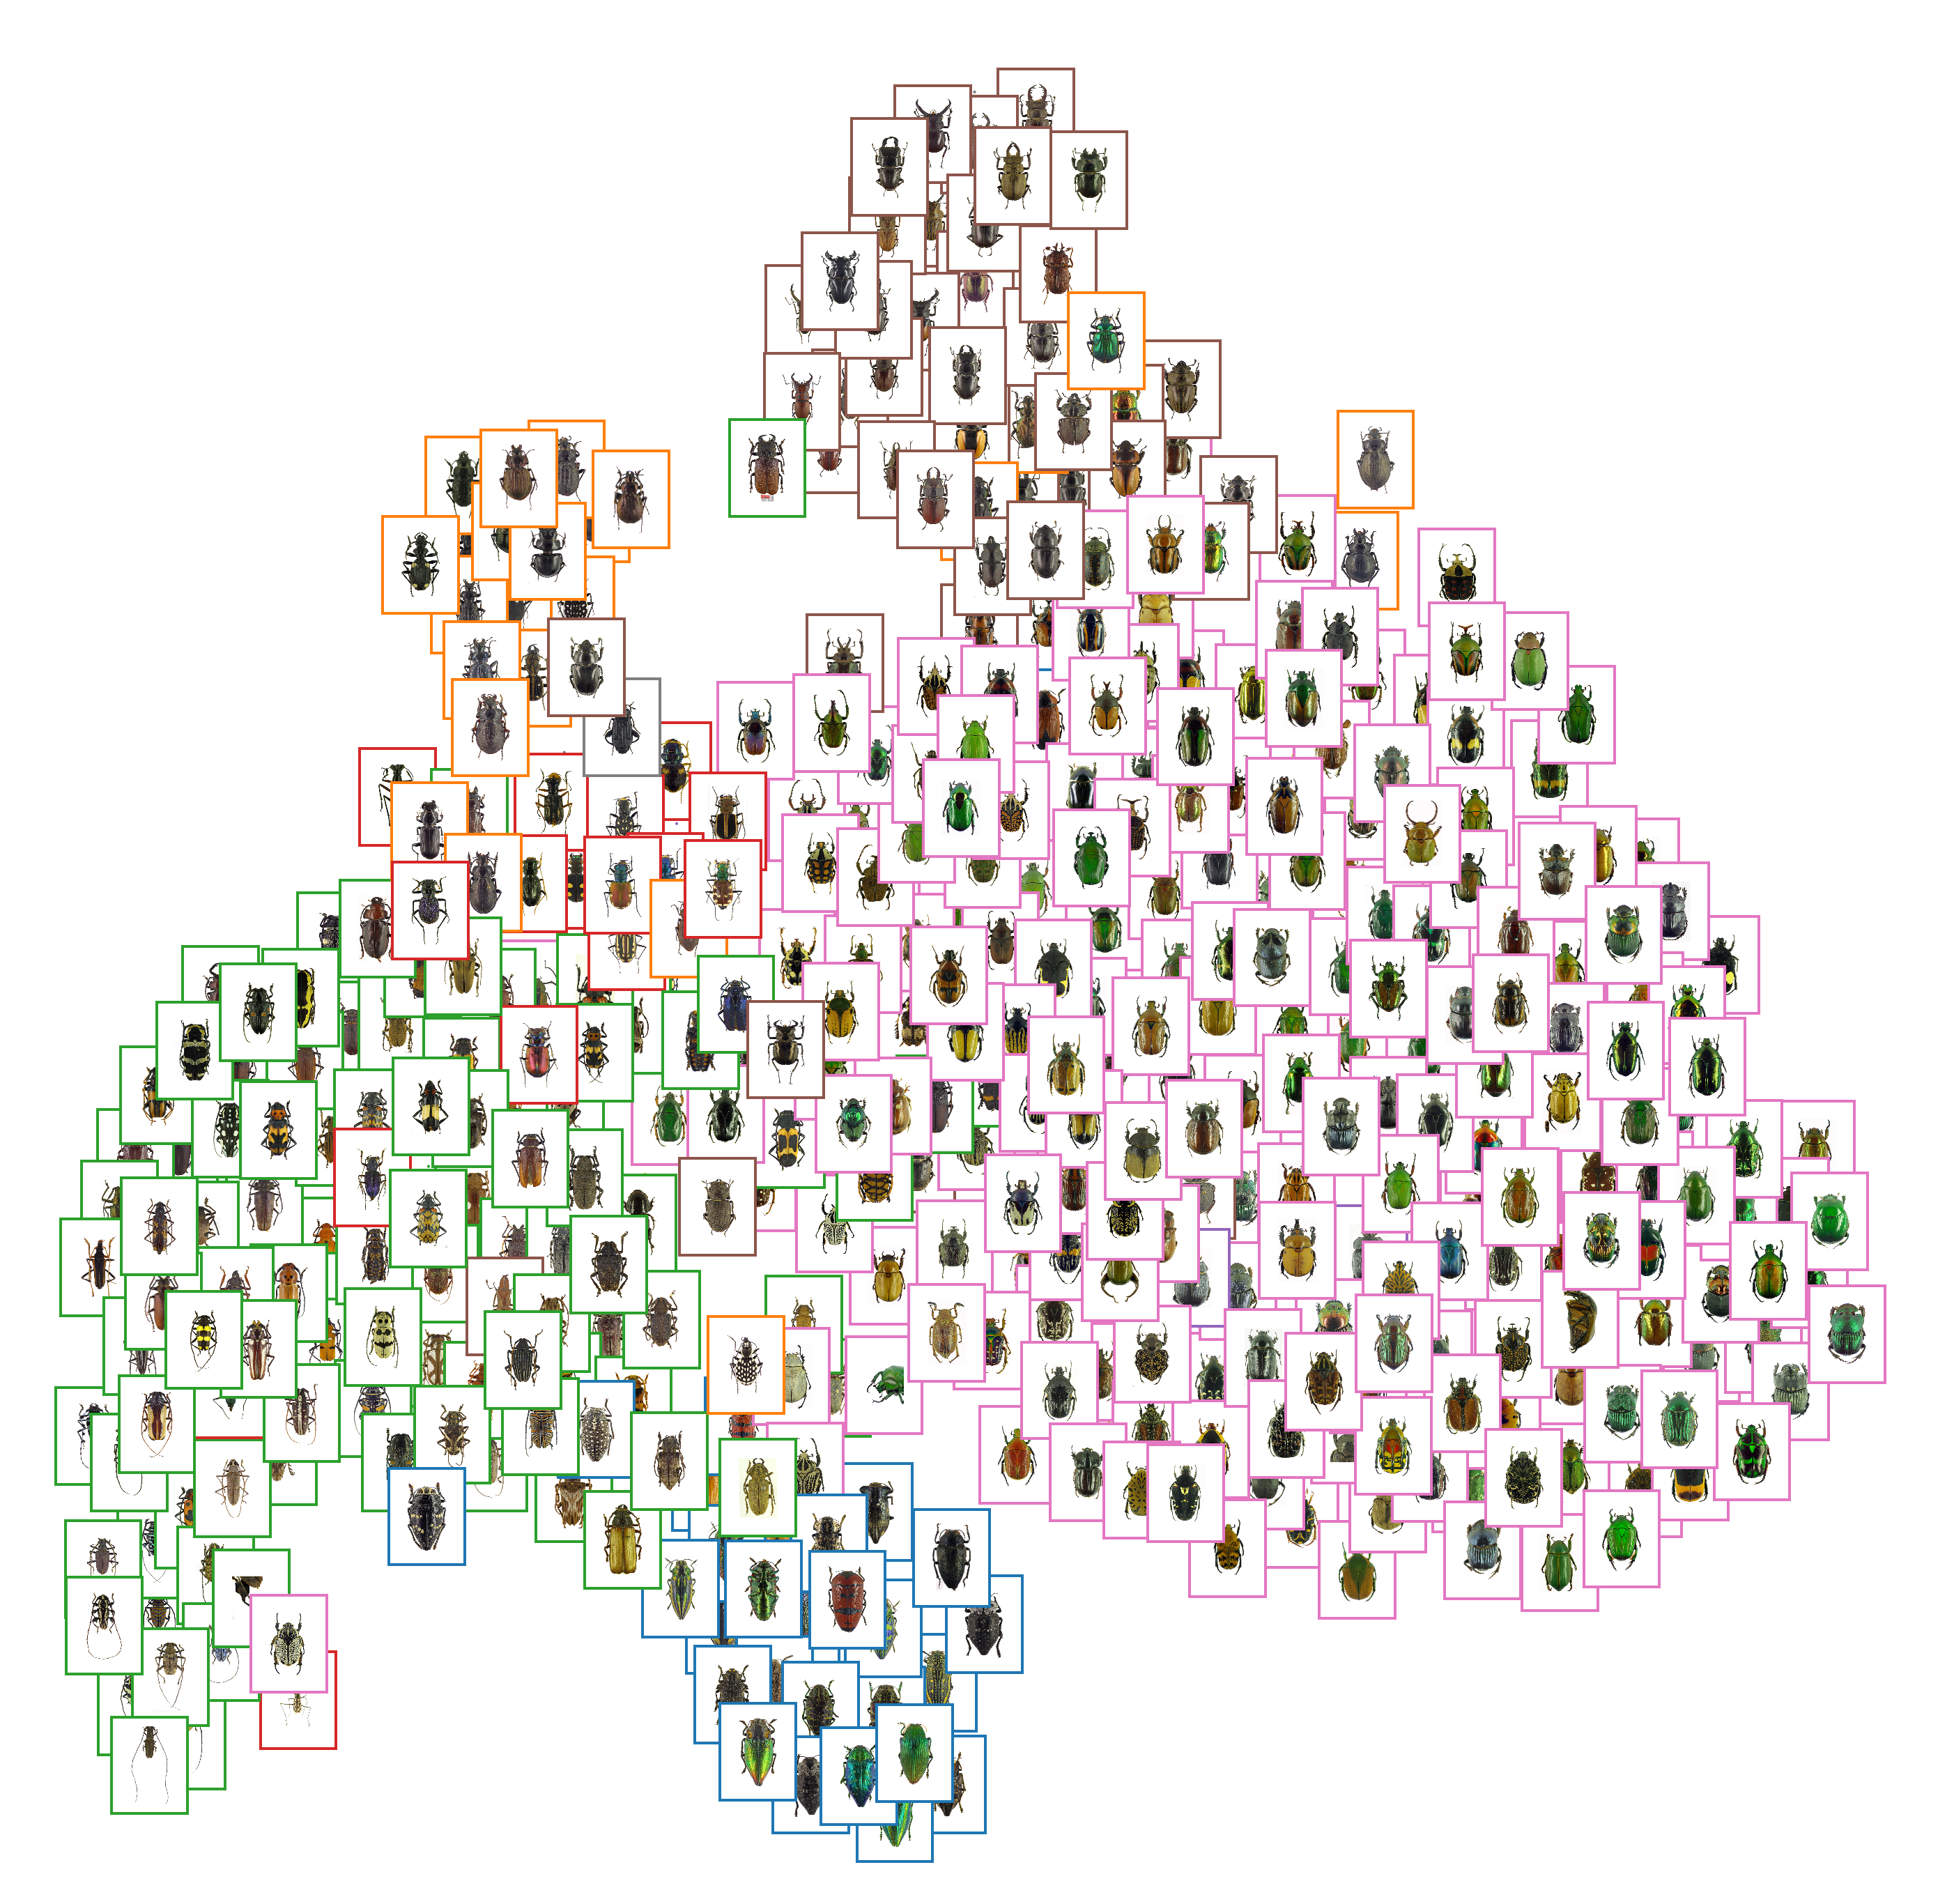

In [70]:
import matplotlib as mpl
def read_img(filename):
    fil=image_dir + filename
    img = cv2.imread(fil)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(100,130))
    return img

# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(50, 50))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1],  s=10, c=class_lab, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.0005: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        #print(image_positions)
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(read_img(filenames[index])),
            position,bboxprops={"edgecolor": cmap(class_lab[index]), "lw": 4})
        plt.gca().add_artist(imagebox)
#    plt.legend(list(le.classes_),loc='upper left', shadow = True, borderpad=2,prop={'size': 30})
plt.axis("off")
plt.savefig("/tf/beetleData/HERE.PNG")
plt.show()

In [ ]:
plt.savefig('/tf/beetleData/testCluster.jpg')

In [ ]:
plt.imshow(read_img(filenames[index]))

In [ ]:
imagebox = mpl.offsetbox.AnnotationBbox(
    mpl.offsetbox.OffsetImage(read_img(filenames[index]), cmap="binary"),
    position, bboxprops={"edgecolor": cmap(class_labels[index]), "lw": 2})

In [ ]:
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(read_img(filenames[index]), cmap="binary"))
            #position, bboxprops={"edgecolor": cmap(class_labels[index]), "lw": 2})
        plt.gca().add_artist(imagebox)